
This is an example digital architecture based on Eyeriss by Yu-Hsin Chen, Tushar
Krishna, Joel Emer, and Vivienne Sze.

Some of the important variables for nestquant:

- *TECHNOLOGY*: 65 nm
- *SUPPORTED_INPUT_BITS*: 8 bit(s)
- *SUPPORTED_OUTPUT_BITS*: 16 bit(s)
- *SUPPORTED_WEIGHT_BITS*: 8 bit(s)
- *GLOBAL_CYCLE_SECONDS*: 1e-09 clock period

Components are defined the following places:
- workspace/models/arch/1_macro/example_traditional/example_components/components.csv
- workspace/models/arch/1_macro/example_traditional/components.yaml
- The top-level components locations
  - workspace/models/components/components/*.yaml
  - workspace/models/components/components/accelergy_plug_ins/*.py
  
Place new components in any of these places!



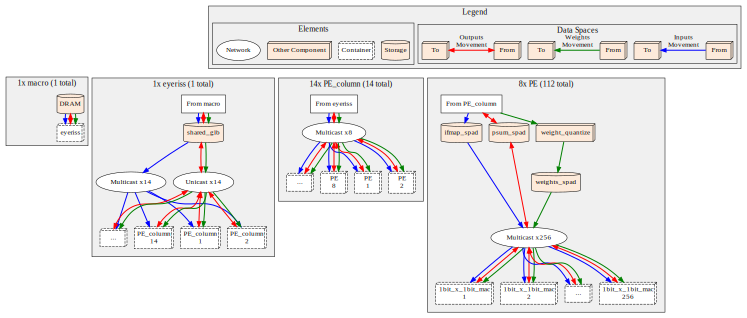

In [57]:
from _tests import scripts
from scripts.notebook_utils import *

display_markdown(
    f"""
This is an example digital architecture based on Eyeriss by Yu-Hsin Chen, Tushar
Krishna, Joel Emer, and Vivienne Sze.

{get_important_variables_markdown('nestquant')}

Components are defined the following places:
- workspace/models/arch/1_macro/example_traditional/example_components/components.csv
- workspace/models/arch/1_macro/example_traditional/components.yaml
- The top-level components locations
  - workspace/models/components/components/*.yaml
  - workspace/models/components/components/accelergy_plug_ins/*.py
  
Place new components in any of these places!

"""
)
display_diagram(get_diagram("nestquant", ignore=DIAGRAM_DEFAULT_IGNORE))


   ### Area and energy breakdown
   This example architecture doesn't have a suite of tests, but you may
   look at the other example architectures for inspiration.        
   

Running on layer /home/workspace/models/workloads/llm/gemm.yaml


100%|██████████| 2/2 [00:21<00:00, 11.00s/it]


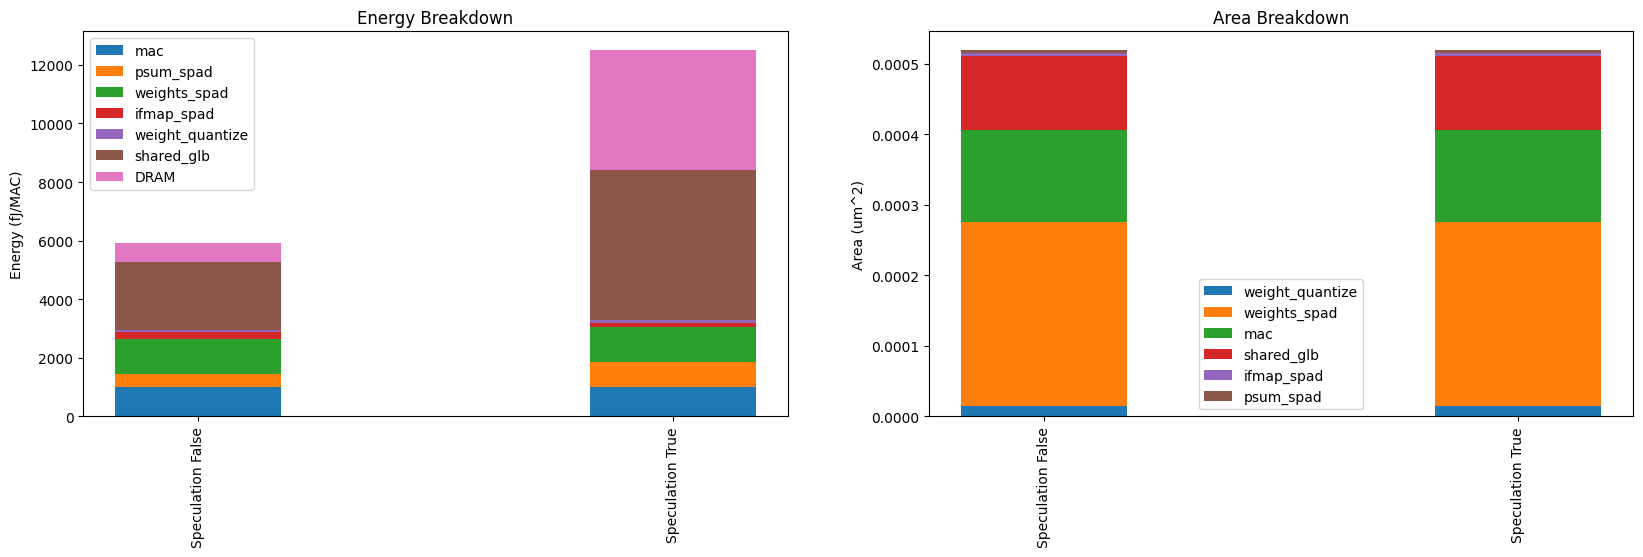

In [58]:
result = run_test("nestquant", "test_area_energy_breakdown")
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
bar_stacked(
    {f"Speculation {r.variables['QUANTIZE']}": r.per_compute('per_component_energy')*1e15 for r in result},
    ylabel="Energy (fJ/MAC)",
    title=f"Energy Breakdown",
    ax=axs[0]
)
bar_stacked(
    {f"Speculation {r.variables['QUANTIZE']}": r.per_compute('per_component_area')*1e12 for r in result},
    ylabel="Area (um^2)",
    title=f"Area Breakdown",
    ax=axs[1]
)

In [12]:
result[0].per_compute('per_component_energy')

{'mac': 9.994239999999999e-13,
 'psum_spad': 8.86784e-13,
 'weights_spad': 2.4985600000000002e-12,
 'ifmap_spad': 6.574080000000001e-13,
 'output_quantize': 8.335359999999999e-13,
 'shared_glb': 5.7344e-12,
 'DRAM': 1.18784e-10}

In [7]:
result[0].per_compute('per_component_energy') ENCODED_WEIGHT_BITS=2 ; Q at PE level

{'mac': 9.996799999999998e-13,
 'psum_spad': 5.247999999999998e-13,
 'weights_spad': 1.25056e-12,
 'ifmap_spad': 3.2895999999999994e-13,
 'weight_quantize': 6.2464e-13,
 'shared_glb': 3.8143999999999996e-12,
 'DRAM': 5.4912e-11}

In [9]:
result[0].per_compute('per_component_energy') ENCODED_WEIGHT_BITS=4 ; Q at PE level

{'mac': 1.00096e-12,
 'psum_spad': 5.247999999999998e-13,
 'weights_spad': 2.50112e-12,
 'ifmap_spad': 3.2768e-13,
 'weight_quantize': 6.2464e-13,
 'shared_glb': 3.8143999999999996e-12,
 'DRAM': 6.8608e-11}

In [11]:
result[0].per_compute('per_component_energy') ENCODED_WEIGHT_BITS=8 ; Q at PE level

{'mac': 9.984e-13,
 'psum_spad': 5.2736e-13,
 'weights_spad': 5.00224e-12,
 'ifmap_spad': 3.28704e-13,
 'weight_quantize': 1.24928e-12,
 'shared_glb': 3.8143999999999996e-12,
 'DRAM': 1.00352e-10}

In [27]:
result[0].per_compute('per_component_energy') ENCODED_WEIGHT_BITS=2 ; Q before shared_glb

{'mac': 9.996799999999998e-13,
 'psum_spad': 5.247999999999998e-13,
 'weights_spad': 1.25056e-12,
 'ifmap_spad': 3.2895999999999994e-13,
 'shared_glb': 3.8143999999999996e-12,
 'weight_quantize': 3.1232e-13,
 'DRAM': 5.4912e-11}

In [24]:
result[0].per_compute('per_component_energy') ENCODED_WEIGHT_BITS=4 ; Q before shared_glb

{'mac': 1.00096e-12,
 'psum_spad': 5.247999999999998e-13,
 'weights_spad': 2.50112e-12,
 'ifmap_spad': 3.2768e-13,
 'shared_glb': 3.8143999999999996e-12,
 'weight_quantize': 6.2464e-13,
 'DRAM': 6.8608e-11}

In [29]:
result[0].per_compute('per_component_energy') ENCODED_WEIGHT_BITS=8 ; Q before shared_glb

{'mac': 9.984e-13,
 'psum_spad': 5.2736e-13,
 'weights_spad': 5.00224e-12,
 'ifmap_spad': 3.28704e-13,
 'shared_glb': 3.8143999999999996e-12,
 'weight_quantize': 1.24928e-12,
 'DRAM': 1.00352e-10}

In [30]:
result[0].per_compute('per_component_area')

{'weight_quantize': 1.0535714285714286e-11,
 'weights_spad': 2e-08,
 'mac': 9.999974399999999e-09,
 'shared_glb': 8.006964285714285e-09,
 'ifmap_spad': 3.03404e-10,
 'psum_spad': 3.7217200000000004e-10}

In [33]:
result[0].per_compute('per_component_energy')

{'mac': 9.984e-13,
 'psum_spad': 5.2736e-13,
 'weights_spad': 5.00224e-12,
 'ifmap_spad': 3.28704e-13,
 'shared_glb': 3.8143999999999996e-12,
 'weight_quantize': 1.24928e-12,
 'DRAM': 1.00352e-10}

In [35]:
result[0].per_compute('per_component_energy')

{'mac': 9.984e-13,
 'psum_spad': 5.2736e-13,
 'weights_spad': 5.00224e-12,
 'ifmap_spad': 3.28704e-13,
 'shared_glb': 3.8143999999999996e-12,
 'weight_quantize': 1.24928e-10,
 'DRAM': 1.00352e-10}

In [43]:
result[0].per_compute('per_component_energy')

{'mac': 9.984e-13,
 'psum_spad': 5.2736e-13,
 'weights_spad': 5.00224e-12,
 'ifmap_spad': 3.28704e-13,
 'shared_glb': 3.8143999999999996e-12,
 'weight_quantize': 1.24928e-12,
 'DRAM': 1.00352e-10}

In [49]:
result[0].per_compute('per_component_energy') with dummy

{'mac': 1.00096e-12,
 'psum_spad': 6.476799999999999e-13,
 'weights_spad': 1.024e-12,
 'ifmap_spad': 3.2768e-13,
 'shared_glb': 1.0368e-11,
 'weight_quantize': 9.7536e-15,
 'DRAM': 3.3536e-11}

In [52]:
result[0].per_compute('per_component_energy') before sgb w/o dummy

{'mac': 1.00096e-12,
 'psum_spad': 4.6336e-13,
 'weights_spad': 1.00096e-12,
 'ifmap_spad': 3.2768e-13,
 'shared_glb': 3.4560000000000002e-12,
 'weight_quantize': 3.0464000000000006e-16,
 'DRAM': 2.0582400000000004e-11}

In [56]:
result[0].per_compute('per_component_energy') at PE level

{'mac': 1.00096e-12,
 'psum_spad': 4.6336e-13,
 'weights_spad': 1.00096e-12,
 'ifmap_spad': 3.2768e-13,
 'weight_quantize': 6.092800000000001e-16,
 'shared_glb': 3.4560000000000002e-12,
 'DRAM': 2.0582400000000004e-11}

In [59]:
result[0].per_compute('per_component_energy') 

{'mac': 1.00096e-12,
 'psum_spad': 4.633600000000001e-13,
 'weights_spad': 1.18784e-12,
 'ifmap_spad': 2.28864e-13,
 'weight_quantize': 7.808e-14,
 'shared_glb': 2.3244800000000002e-12,
 'DRAM': 6.4e-13}

In [62]:
result[0].per_component_area 

{'weight_quantize': 1.3216e-07,
 'weights_spad': 2.24e-06,
 'mac': 1.12e-06,
 'shared_glb': 8.9678e-07,
 'ifmap_spad': 3.3981248e-08,
 'psum_spad': 4.1683264e-08}